# Advanced Topic Modeling: Part 2

In [1]:
from pathlib import Path

import dariah
import cophi

## Preprocessing a corpus

In [2]:
directory = Path("data", "british-fiction-corpus")

In [3]:
corpus, metadata = cophi.corpus(directory,
                                lemma=True,
                                pos=["NN"],
                                language="en",
                                metadata=True)

In [4]:
metadata.iloc[:5]

,filepath,parent,suffix,title,uuid
0,data/british-fiction-corpus/fielding_tom.txt,data/british-fiction-corpus,.txt,fielding_tom,e84162fe-6da3-11e9-bdd2-7c7a9196f28f
1,data/british-fiction-corpus/thackeray_lyndon.txt,data/british-fiction-corpus,.txt,thackeray_lyndon,100b1438-6da4-11e9-bdd2-7c7a9196f28f
2,data/british-fiction-corpus/fielding_joseph.txt,data/british-fiction-corpus,.txt,fielding_joseph,324c170e-6da4-11e9-bdd2-7c7a9196f28f
3,data/british-fiction-corpus/dickens_bleak.txt,data/british-fiction-corpus,.txt,dickens_bleak,58eb7378-6da4-11e9-bdd2-7c7a9196f28f
4,data/british-fiction-corpus/thackeray_vanity.txt,data/british-fiction-corpus,.txt,thackeray_vanity,9ad04e08-6da4-11e9-bdd2-7c7a9196f28f


### Extending metadata

In [5]:
metadata["year"] = [1868, 1853, 1860, 1799, 1742, 1749, 1844, 1850, 1876, 1848]
metadata.iloc[:5]

,filepath,parent,suffix,title,uuid,year
0,data/british-fiction-corpus/fielding_tom.txt,data/british-fiction-corpus,.txt,fielding_tom,e84162fe-6da3-11e9-bdd2-7c7a9196f28f,1868
1,data/british-fiction-corpus/thackeray_lyndon.txt,data/british-fiction-corpus,.txt,thackeray_lyndon,100b1438-6da4-11e9-bdd2-7c7a9196f28f,1853
2,data/british-fiction-corpus/fielding_joseph.txt,data/british-fiction-corpus,.txt,fielding_joseph,324c170e-6da4-11e9-bdd2-7c7a9196f28f,1860
3,data/british-fiction-corpus/dickens_bleak.txt,data/british-fiction-corpus,.txt,dickens_bleak,58eb7378-6da4-11e9-bdd2-7c7a9196f28f,1799
4,data/british-fiction-corpus/thackeray_vanity.txt,data/british-fiction-corpus,.txt,thackeray_vanity,9ad04e08-6da4-11e9-bdd2-7c7a9196f28f,1742


In [6]:
dtm = corpus.drop(corpus.dtm, corpus.hapax)

In [7]:
dtm = corpus.map_metadata(data=dtm,
                          metadata=metadata,
                          uuid="uuid",
                          fields=["year", "title"],
                          sep="_").fillna(0).astype(int)
dtm.iloc[:5,:10]

,a-year,abbe,abhorrence,ability,abode,absence,absolution,absurdity,abundance,abuse
1868_fielding_tom,2,0,8,6,4,9,2,5,2,12
1853_thackeray_lyndon,0,7,0,2,1,6,0,1,0,6
1860_fielding_joseph,0,7,0,2,1,6,0,1,0,6
1799_dickens_bleak,0,7,0,2,1,6,0,1,0,6
1742_thackeray_vanity,0,0,2,1,2,15,0,0,1,3


## Training a model

In [9]:
model = dariah.core.LDA(num_topics=10,
                        num_iterations=1000,
                        mallet="mallet-2.0.8/bin/mallet")
model.fit(dtm)

In [10]:
model.topics.iloc[:, :5]

,word0,word1,word2,word3,word4
topic0,lady,gentleman,mother,men,day
topic1,way,princess,name,time,uncle
topic2,friend,lady,love,honour,fellow
topic3,person,woman,squire,father,hath
topic4,girl,sister,child,daughter,night
topic5,man,fellow,play,son,life
topic6,dear,hand,lady,room,son
topic7,man,time,matter,chapter,house
topic8,father,time,place,home,wife
topic9,way,face,heart,sir,people


## Visualizing a model

In [11]:
vis = dariah.core.Vis(model)

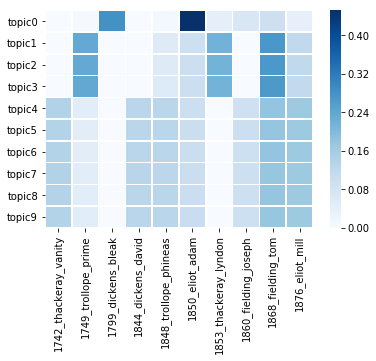

In [12]:
%matplotlib inline

vis.topic_document()